## Introduction aux Réseaux de Neurones




In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Paramètres utiles pour le modèle
num_classes = 10
input_shape = (28, 28, 1)

# données train et test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation (Les réseaux de neurones préfèrent des valeurs entre -1 et 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# On s'assure que les images sont 3D (hauteur, largeur, profondeur) et non pas 2D (hauteur, largeur)
if len(x_train.shape) == 3:
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Conversion des labels par exemple 2 en [0, 0, 1, 0, 0, 0] (mais ici on est sur des vecteurs de dimension 10)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Réseau de Neurones Artificiel (ANN ou FNN)

In [ ]:
# Créer ton modèle !

from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Vous aurez besoin d'utiliser ces layers :                  (Ici les arguments nécessaires pour programmer les layers)
#                                           - Input        # shape
#                                           - Flatten
#                                           - Dense        # units, activation
#                                           - Dropout      # rate

# Les variables à ta disposition sont : 
#                                       - input_shape 
#                                       - num_classes 

######################## Ton code ici ##############################

model = keras.Sequential(
        [
        Flatten(input_shape=input_shape),
        Dense(512, activation="relu"),
        Dropout(0.4),
        Dense(512, activation="relu"),
        Dropout(0.4),
        Dense(10, activation="softmax")
    ]
)

######################## Ton code ici ##############################

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [ ]:
# Training

from tensorflow.keras.optimizers import Adam

batch_size = 128   # Le nombre d'exemples que l'IA va voir d'un coup
epochs = 10      # Le nombre de fois que l'IA va voir l'ensemble des données

model.compile(loss="categorical_crossentropy",     # Fonction d'erreur
              optimizer=Adam(learning_rate=0.001), # Optimisation de l'apprentissage
              metrics=["accuracy"])                # Mesure de la précision

model.fit(x_train,               # Images
          y_train,               # Labels
          batch_size=batch_size, # Le nombre d'exemples que l'IA va voir d'un coup
          epochs=epochs,         # Le nombre de fois que l'IA va voir l'ensemble des données
          validation_split=0.1);  # Le pourcentage d'exemples de vérification (sur lesquels l'IA ne s'entraînera pas)

Epoch 1/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0310 - val_accuracy: 0.9910
Epoch 2/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0307 - val_accuracy: 0.9910
Epoch 3/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0374 - val_accuracy: 0.9903
Epoch 4/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.0491 - val_accuracy: 0.9890
Epoch 5/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0421 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.0460 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0421 - val_accuracy: 0.9915

In [ ]:
# Evaluate

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03321247920393944
Test accuracy: 0.9927999973297119



 Voici un 4 et l'IA a vu un 4 ... 



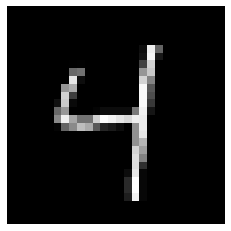

In [ ]:
# Teste ton modèle sur une image en particulier !

from random import randint

indice = randint(0, y_test.shape[0]-1)

image = x_test[indice]
label = np.argmax(y_test[indice])

image = np.expand_dims(image, 0) # permet d'avoir un batch_size = 1
#                                # car l'IA prend des données de dimension 4 (batch_size, hauteur, largeur, channels)
#                                # channels sert pour les images en couleurs par exemple (RGB)

prediction = model.predict(image)   # On effectue la prédiction

prediction = np.squeeze(prediction) # On enlève les dimensions inutiles (ici batch_size : en effet on passe d'une matrice (1, 10) à un vecteur (10,))

prediction = np.argmax(prediction)  # Changer [0, 0, 1, 0, 0, 0] en 2 par exemple (mais ici on est sur des vecteurs de dimension 10)

import matplotlib.pyplot as plt

print("\n Voici un", label, "et l'IA a vu un", prediction, "... \n")

plt.axis('off')
plt.imshow(np.squeeze(image), cmap=plt.get_cmap("gray"));

## Réseau de Neurones à Convolutions (CNN)

In [5]:
# Créer ton modèle !

from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Vous aurez besoin d'utiliser ces layers :                # (Ici les arguments nécessaires pour programmer les layers)
#                                           - Input        # shape
#                                           - Conv2D       # filters, kernel_size, activation
#                                           - MaxPooling2D # pool_size
#                                           - Flatten
#                                           - Dropout      # rate
#                                           - Dense        # units, activation (comme pour Conv2D)

# Les variables à ta disposition sont : 
#                                       - input_shape 
#                                       - num_classes 

######################## Ton code ici ##############################

model = keras.Sequential(
    [
        
        Conv2D(32, kernel_size=3 , activation= "relu", input_shape =(28,28,1)),
        Dropout(0.2),
        Conv2D(128, kernel_size=3 , activation= "relu", input_shape =(28,28,1)),
        MaxPooling2D(pool_size=2),
        Conv2D(128, kernel_size=3 , activation= "relu", input_shape =(28,28,1)),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(10, activation="softmax")
  
        
    ]
)

######################## Ton code ici ##############################

model.summary()

NameError: ignored

In [3]:
# Training

from tensorflow.keras.optimizers import Adam

batch_size = 128   # Le nombre d'exemples que l'IA va voir d'un coup
epochs = 10        # Le nombre de fois que l'IA va voir l'ensemble des données

model.compile(loss="categorical_crossentropy",     # Fonction d'erreur
              optimizer=Adam(learning_rate=0.001), # Optimisation de l'apprentissage
              metrics=["accuracy"])                # Mesure de la précision

model.fit(x_train,                # Images
          y_train,                # Labels
          batch_size=batch_size,  # Le nombre d'exemples que l'IA va voir d'un coup
          epochs=epochs,          # Le nombre de fois que l'IA va voir l'ensemble des données
          validation_split=0.1);  # Le pourcentage d'exemples de vérification (sur lesquels l'IA ne s'entraînera pas)

NameError: ignored

In [2]:
# Evaluate

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

NameError: ignored


 Voici un 3 et l'IA a vu un 3 ... 



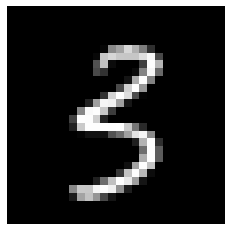

In [ ]:
# Teste ton modèle sur une image en particulier !

from random import randint

indice = randint(0, y_test.shape[0]-1)

image = x_test[indice]
label = np.argmax(y_test[indice])

image = np.expand_dims(image, 0) # permet d'avoir un batch_size = 1
#                                # car l'IA prend des données de dimension 4 (batch_size, hauteur, largeur, channels)
#                                # channels sert pour les images en couleurs par exemple (RGB)

prediction = model.predict(image)   # On effectue la prédiction

prediction = np.squeeze(prediction) # On enlève les dimensions inutiles (ici batch_size : en effet on passe d'une matrice (1, 10) à un vecteur (10,))

prediction = np.argmax(prediction)  # Changer [0, 0, 1, 0, 0, 0] en 2 par exemple (mais ici on est sur des vecteurs de dimension 10)

import matplotlib.pyplot as plt

print("\n Voici un", label, "et l'IA a vu un", prediction, "... \n")

plt.axis('off')
plt.imshow(np.squeeze(image), cmap=plt.get_cmap("gray"));

## Réseau de Neurones Récurrents (RNN)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_nb_of_words = 20000    # On ne prend en compte que les _ 1ers mots
max_len = 200              # On ne regarde que les _ 1ers mots de chaque review

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_nb_of_words)

word_to_int = keras.datasets.imdb.get_word_index()
int_to_word = dict()

int_to_word[0] = "<UNK>"
for word, integ in word_to_int.items():
  int_to_word[integ] = word

print("Longueur de chaque dict :", len(word_to_int), len(int_to_word))

print(len(x_train), "Training sequences")
print(len(x_test), "Validation sequences")

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)    # On formate chaque review pour qu'elles soient toutes de même longueur
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)      # Même idée

1646592/1641221 [==============================] - 0s 0us/step
Longueur de chaque dict : 88584 88585
25000 Training sequences
25000 Validation sequences


In [ ]:
# Créer ton modèle !

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Vous aurez besoin d'utiliser ces layers :                # (Ici les arguments nécessaires pour programmer les layers)
#                                           - Input        # shape, dtype="int32"
#                                           - Embedding    # input_dim, output_dim, (input_length peut parfois être utile)
#                                           - LSTM         # units, return_sequences
#                                           - Dense        # units, activation (comme pour Conv2D)

# Les variables à ta disposition sont : 
#                                       - input_shape 
#                                       - num_classes 

######################## Ton code ici ##############################

# Input for variable-length sequences of integers
inputs = 
# Embedding qui associe à chaque entier un vecteur de dimension "output_dim"
x = 

# Ajouter le ou les LSTM
x = 
x = 
# Add a classifier
outputs = 

######################## Ton code ici ##############################

model = Model(inputs, outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,642,497
Trainable params: 2,642,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training

from tensorflow.keras.optimizers import Adam

batch_size = 32    # Le nombre d'exemples que l'IA va voir d'un coup
epochs = 2         # Le nombre de fois que l'IA va voir l'ensemble des données

model.compile(loss="binary_crossentropy",          # Fonction d'erreur
              optimizer=Adam(learning_rate=0.001), # Optimisation de l'apprentissage
              metrics=["accuracy"])                # Mesure de la précision

model.fit(x_train,                # Images
          y_train,                # Labels
          batch_size=batch_size,  # Le nombre d'exemples que l'IA va voir d'un coup
          epochs=epochs,          # Le nombre de fois que l'IA va voir l'ensemble des données
          validation_split=0.1);  # Le pourcentage d'exemples de vérification (sur lesquels l'IA ne s'entraînera pas)

Epoch 1/2
704/704 [==============================] - 72s 102ms/step - loss: 0.4272 - accuracy: 0.8067 - val_loss: 0.3176 - val_accuracy: 0.8692
Epoch 2/2
704/704 [==============================] - 71s 101ms/step - loss: 0.2114 - accuracy: 0.9216 - val_loss: 0.3236 - val_accuracy: 0.8788


In [ ]:
# Evaluate

score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

782/782 [==============================] - 23s 29ms/step - loss: 0.3471 - accuracy: 0.8621
Test loss: 0.3471335172653198
Test accuracy: 0.8621199727058411


In [ ]:
# Teste ton modèle sur une review en particulier !

from random import randint

indice = randint(0, y_test.shape[0]-1)

review = x_test[indice]
label = y_test[indice]

review = np.expand_dims(review, 0)   # permet d'avoir un batch_size = 1 (même idée qu'avant)

prediction = model.predict(review)   # On effectue la prédiction

prediction = np.squeeze(prediction)  # On enlève les dimensions inutiles (ici batch_size : en effet on passe d'une matrice (1, 1) à un vecteur (1,))


review = [int_to_word[i] for i in review[0, :]] # Liste d'entiers -> liste de mots

sequence = 20
print("")
for i in range(0, len(review), sequence):
  print(' '.join(review[i:i+sequence]))
print("")

print("Cette review est", "positive." if label==1 else "negative.")
print("L'IA pense que cette review est", "positive." if prediction==1 else "negative.")


story one will only jennifer mother to evil is tidy his for series is do 10 not was two would
affair are about yes they by br about town's to this is kitchen face would shadows most would against same
of destroyed this about drawn to three used survival friends would killing kitchen jason by 10 always months it for
even kid don't do alberto game in stupid want about acting it conducting family point through about too this of
here would role of feel would tries realise role good yet br popular great an did about won't realise it
these world partners not was can for all had there typing was then can such plot great tale britain would
horror mind to if very in can realise this is whose opinion film play all drew has girl been written
of taylor all it other behalf and compared still to it is very none in and i i had of
ever it her her to was hair that along most throughout good being quickly of being was true sixth there
years lost just think unknowns listen jason have well can surprising

## Réseau de Neurones Récurrents Bidirectionnels (BRNN)

In [ ]:
# Créer ton modèle !

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Vous aurez besoin d'utiliser ces layers :                 # (Ici les arguments nécessaires pour programmer les layers)
#                                           - Input         # shape, dtype="int32"
#                                           - Embedding     # input_dim, output_dim, (input_length peut parfois être utile)
#                                           - Bidirectional
#                                           - LSTM          # units, return_sequences
#                                           - Dense         # units, activation (comme pour Conv2D)

# Les variables à ta disposition sont : 
#                                       - input_shape 
#                                       - num_classes 

######################## Ton code ici ##############################

# Input for variable-length sequences of integers
inputs = 

# Embedding qui associe à chaque entier un vecteur de dimension "output_dim"
x = 

# Ajouter le ou les LSTM
x = 
x = 

# Ajouter la sortie
outputs = 

######################## Ton code ici ##############################

model = Model(inputs, outputs)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training

from tensorflow.keras.optimizers import Adam

batch_size = 32    # Le nombre d'exemples que l'IA va voir d'un coup
epochs = 2         # Le nombre de fois que l'IA va voir l'ensemble des données

model.compile(loss="binary_crossentropy",          # Fonction d'erreur
              optimizer=Adam(learning_rate=0.001), # Optimisation de l'apprentissage
              metrics=["accuracy"])                # Mesure de la précision

model.fit(x_train,                # Images
          y_train,                # Labels
          batch_size=batch_size,  # Le nombre d'exemples que l'IA va voir d'un coup
          epochs=epochs,          # Le nombre de fois que l'IA va voir l'ensemble des données
          validation_split=0.1);  # Le pourcentage d'exemples de vérification (sur lesquels l'IA ne s'entraînera pas)

Epoch 1/2
704/704 [==============================] - 132s 188ms/step - loss: 0.4175 - accuracy: 0.8082 - val_loss: 0.3485 - val_accuracy: 0.8660
Epoch 2/2
704/704 [==============================] - 131s 186ms/step - loss: 0.2174 - accuracy: 0.9164 - val_loss: 0.3569 - val_accuracy: 0.8568


In [ ]:
# Evaluate

score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

782/782 [==============================] - 56s 71ms/step - loss: 0.3589 - accuracy: 0.8572
Test loss: 0.358852744102478
Test accuracy: 0.857200026512146


In [ ]:
# Teste ton modèle sur une review en particulier !

from random import randint

indice = randint(0, y_test.shape[0]-1)

review = x_test[indice]
label = y_test[indice]

review = np.expand_dims(review, 0)   # permet d'avoir un batch_size = 1 (même idée qu'avant)

prediction = model.predict(review)   # On effectue la prédiction

prediction = np.squeeze(prediction)  # On enlève les dimensions inutiles (ici batch_size : en effet on passe d'une matrice (1, 1) à un vecteur (1,))


review = [int_to_word[i] for i in review[0, :]] # Liste d'entiers -> liste de mots

sequence = 20
print("")
for i in range(0, len(review), sequence):
  print(' '.join(review[i:i+sequence]))
print("")

print("Cette review est", "positive." if label==1 else "negative.")
print("L'IA pense que cette review est", "positive." if prediction==1 else "negative.")


<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> the then stupid
we as you with makes it's is over makes that with is group ship to by br of sure characters
always your life influential lovely it see makes are journey and influential lovely ever watch doesn't be probably an was
well why it all it his way but characters film is alain guy it's up just even using music director
in perfect have killers truly br sad victor arts as on it is group bought an of too they of
here br of you influential lovely lines is harsh all borrowed what have asked as you stupid great that with
very his which of harsh after looked of on all away comic make painfully at is fond was story br
dead as is breaking didn't not 